In [1]:
#Import the necessary libraries
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.utils import shuffle
import pandas as pd
import numpy as np


In [2]:
#Set the seed value
SEED = 4243

In [3]:
#Read the sample file
sample = pd.read_csv("nlp-getting-started/sample_submission.csv")
sample.head()

,id,target
0,0,0
1,2,0
2,3,0
3,9,0
4,11,0


In [4]:
#Read the training data
train = pd.read_csv("nlp-getting-started/train.csv")
train.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [5]:
#Read the Disaster on Socila Media dataset
test = pd.read_csv("nlp-getting-started/test.csv")
test.head()

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan


In [6]:
train2s = pd.read_csv("archive/socialmedia-disaster-tweets-DFE.csv")
train2s.head()

,_unit_id,_golden,_unit_state,_trusted_judgments,_last_judgment_at,choose_one,choose_one:confidence,choose_one_gold,keyword,location,text,tweetid,userid
0,778243823,True,golden,156,NaN,Relevant,1.0000,Relevant,NaN,NaN,Just happened a terrible car crash,1.0,NaN
1,778243824,True,golden,152,NaN,Relevant,1.0000,Relevant,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,13.0,NaN
2,778243825,True,golden,137,NaN,Relevant,1.0000,Relevant,NaN,NaN,"Heard about #earthquake is different cities, s...",14.0,NaN
3,778243826,True,golden,136,NaN,Relevant,0.9603,Relevant,NaN,NaN,"there is a forest fire at spot pond, geese are...",15.0,NaN
4,778243827,True,golden,138,NaN,Relevant,1.0000,Relevant,NaN,NaN,Forest fire near La Ronge Sask. Canada,16.0,NaN


In [7]:
train2s.head(2)

,_unit_id,_golden,_unit_state,_trusted_judgments,_last_judgment_at,choose_one,choose_one:confidence,choose_one_gold,keyword,location,text,tweetid,userid
0,778243823,True,golden,156,NaN,Relevant,1.0,Relevant,NaN,NaN,Just happened a terrible car crash,1.0,NaN
1,778243824,True,golden,152,NaN,Relevant,1.0,Relevant,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,13.0,NaN


## EDA of Original dataset

In [8]:
#Define the label
TARGET = "target"

In [9]:
#Define a function to plot he Null values in a given DataFrame
def plot_null_values(df):
    print("Total number of samples in the data =",df.shape[0])
    sns.heatmap(df.isnull().sum().to_frame(),
                annot=True,
                fmt="d",
                cmap="crest"
                )

				NULL values in Train Dataset
Total number of samples in the data = 7613


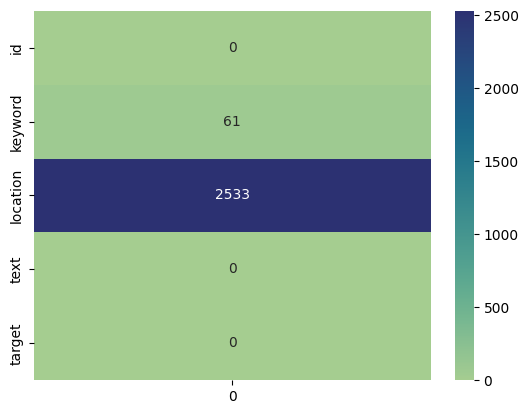

In [10]:
#Use the plot_null_values function to plot Null values in the train dataset
print("\t\t\t\tNULL values in Train Dataset")
plot_null_values(train)

				NULL values in Test Dataset
Total number of samples in the data = 3263


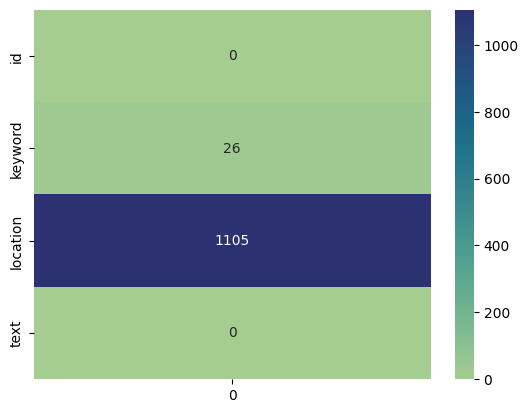

In [11]:
#Use the plot_null_values function to plot Null values in the test dataset
print("\t\t\t\tNULL values in Test Dataset")
plot_null_values(test)

In [12]:
#Replace the Null values with str(0)
train.fillna("0",inplace=True)
test.fillna("0",inplace=True)

				NULL values in Train Dataset
Total number of samples in the data = 7613


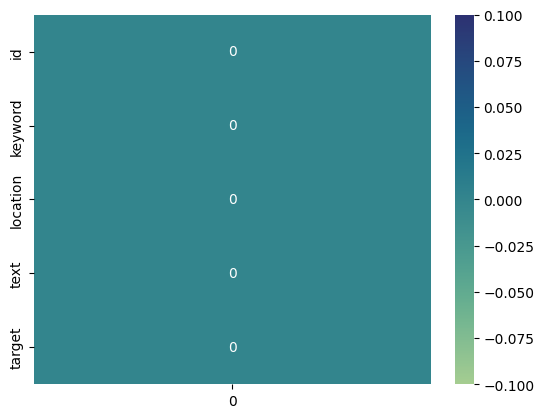

In [13]:
#Check the updated train dataset
print("\t\t\t\tNULL values in Train Dataset")
plot_null_values(train)

				NULL values in Test Dataset
Total number of samples in the data = 3263


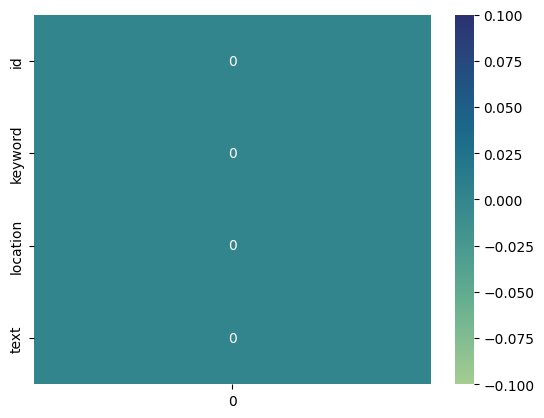

In [14]:
#Check the updated test dataset
print("\t\t\t\tNULL values in Test Dataset")
plot_null_values(test)

In [15]:
#Check for duplicate values
train[train.duplicated()]

,id,keyword,location,text,target


**It is evident that there are no repeated tweets in our dataset.**

## Target Analysis

To assess the balance of our data, let's examine the distribution of values in the "target" column.

<Axes: xlabel='target', ylabel='Count'>

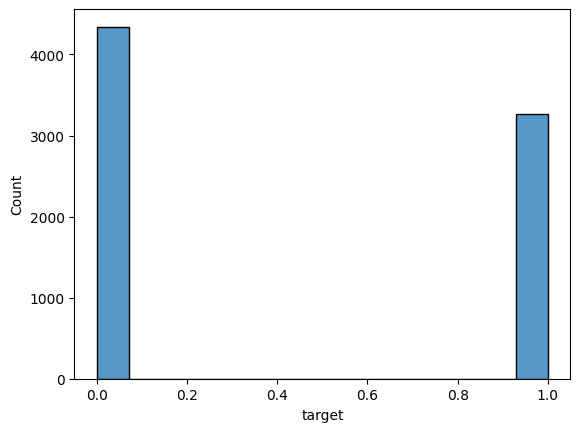

In [16]:
#Target analysis
sns.histplot(x=train[TARGET])

In [17]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Ensure the visualizations are rendered inline
%matplotlib inline


In [18]:
# Display the first few rows of the dataset
train.head()


,id,keyword,location,text,target
0,1,0,0,Our Deeds are the Reason of this #earthquake M...,1
1,4,0,0,Forest fire near La Ronge Sask. Canada,1
2,5,0,0,All residents asked to 'shelter in place' are ...,1
3,6,0,0,"13,000 people receive #wildfires evacuation or...",1
4,7,0,0,Just got sent this photo from Ruby #Alaska as ...,1


In [19]:
# Descriptive statistics for the training data
train.describe()


,id,target
count,7613.000000,7613.00000
mean,5441.934848,0.42966
std,3137.116090,0.49506
min,1.000000,0.00000
25%,2734.000000,0.00000
50%,5408.000000,0.00000
75%,8146.000000,1.00000
max,10873.000000,1.00000


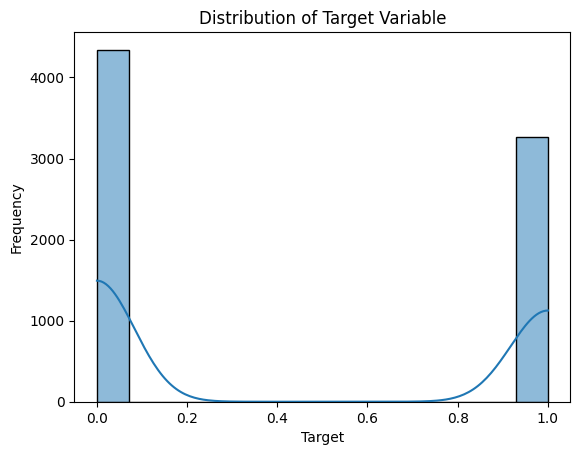

In [20]:
# Visualizing the distribution of the target variable
sns.histplot(train[TARGET], kde=True)
plt.title('Distribution of Target Variable')
plt.xlabel('Target')
plt.ylabel('Frequency')
plt.show()


Total number of samples in the data = 7613


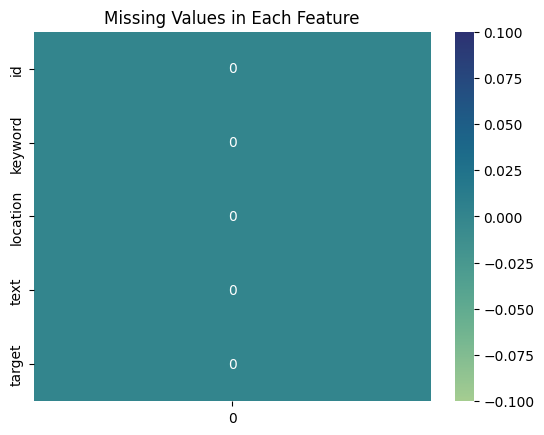

In [21]:
# Function to plot missing values
def plot_null_values(df):
    print("Total number of samples in the data =", df.shape[0])
    sns.heatmap(df.isnull().sum().to_frame(), annot=True, fmt="d", cmap="crest")
    plt.title("Missing Values in Each Feature")
    plt.show()

# Plotting missing values in the train dataset
plot_null_values(train)


In [37]:
# Select only numeric columns for fillna
numeric_cols = train_filled.select_dtypes(include=[np.number])

# Fill missing values in numeric columns with the mean of each column
train_filled[numeric_cols.columns] = numeric_cols.fillna(numeric_cols.mean())

print(train_filled)


         id keyword location  \
0         1       0        0   
1         4       0        0   
2         5       0        0   
3         6       0        0   
4         7       0        0   
...     ...     ...      ...   
7608  10869       0        0   
7609  10870       0        0   
7610  10871       0        0   
7611  10872       0        0   
7612  10873       0        0   

                                                   text  target  
0     Our Deeds are the Reason of this #earthquake M...       1  
1                Forest fire near La Ronge Sask. Canada       1  
2     All residents asked to 'shelter in place' are ...       1  
3     13,000 people receive #wildfires evacuation or...       1  
4     Just got sent this photo from Ruby #Alaska as ...       1  
...                                                 ...     ...  
7608  Two giant cranes holding a bridge collapse int...       1  
7609  @aria_ahrary @TheTawniest The out of control w...       1  
7610  M1.94 [01:04 UT

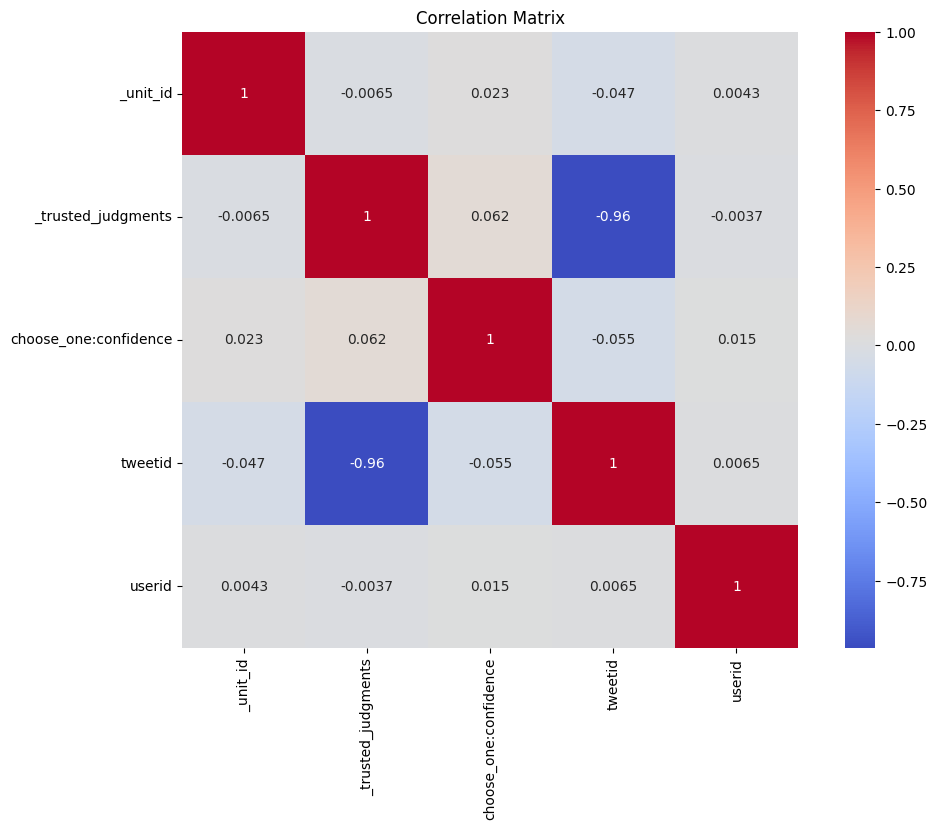

In [23]:
# Select only numerical columns
numerical_cols = train2s.select_dtypes(include=['float64', 'int64'])

# Correlation matrix to understand the relationship between numerical features
corr_matrix = numerical_cols.corr()

# Plotting the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', square=True)
plt.title('Correlation Matrix')
plt.show()


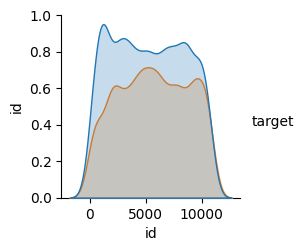

In [24]:
# Visualizing the relationships between features and the target variable
sns.pairplot(train, hue=TARGET)
plt.show()


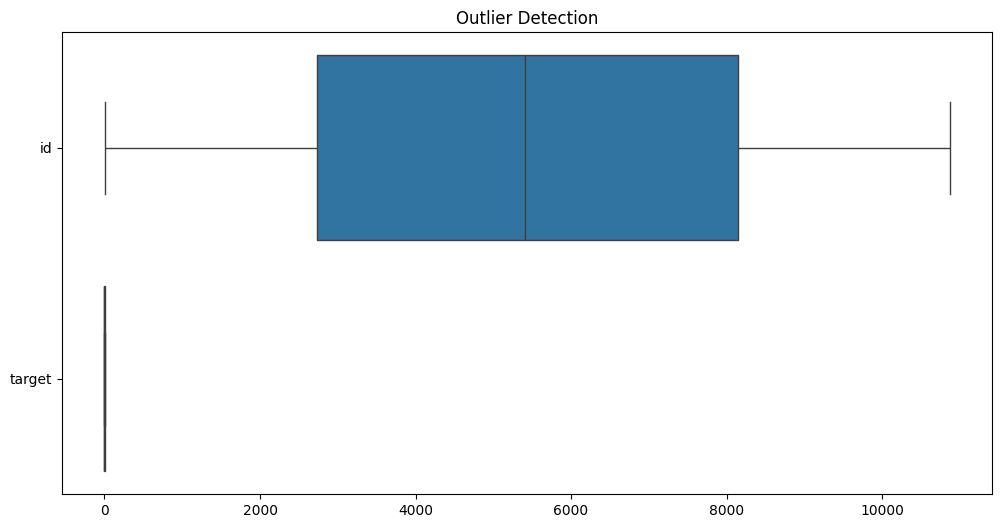

In [25]:
# Box plots to detect outliers in the numerical features
plt.figure(figsize=(12, 6))
sns.boxplot(data=train, orient='h')
plt.title('Outlier Detection')
plt.show()


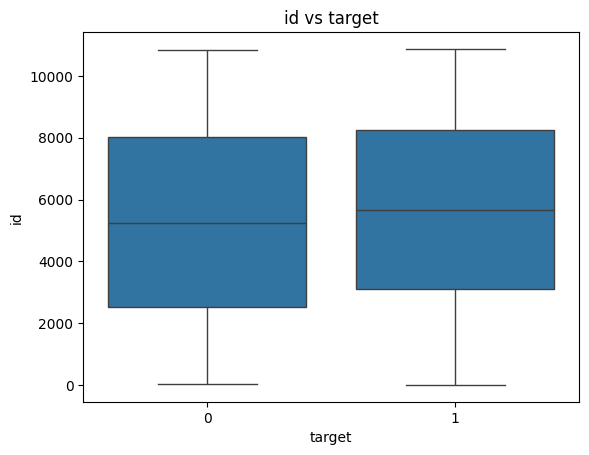

In [26]:
# Example: Analyzing a specific feature against the target variable
feature = 'id'  # Replace with your feature of interest
sns.boxplot(x=train[TARGET], y=train[feature])
plt.title(f'{feature} vs {TARGET}')
plt.show()


In [38]:
# Save the cleaned and processed dataset for later use
train_filled.to_csv("cleaned_train.csv", index=False)


In [164]:
# Save the test dataset to a CSV file
test.to_csv("cleaned_test.csv", index=False)

In [39]:
from sklearn.feature_extraction.text import CountVectorizer
from wordcloud import WordCloud
from collections import Counter
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords


[nltk_data] Downloading package stopwords to C:\Users\Tej
[nltk_data]     Bachhav/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [40]:
# Example: Tokenizing text data and removing stopwords
train['tokens'] = train['text'].apply(lambda x: nltk.word_tokenize(x.lower()))
stop_words = set(stopwords.words('english'))
train['tokens'] = train['tokens'].apply(lambda x: [word for word in x if word.isalpha() and word not in stop_words])


In [41]:
# Example: Word frequency distribution
all_words = [word for tokens in train['tokens'] for word in tokens]
word_freq = Counter(all_words)

# Display the most common words
most_common_words = word_freq.most_common(10)
print("Most common words:", most_common_words)


Most common words: [('http', 4307), ('https', 409), ('like', 346), ('amp', 344), ('fire', 249), ('get', 228), ('new', 223), ('via', 218), ('people', 197), ('news', 197)]


In [42]:
# Function to extract n-grams
def get_ngrams(corpus, n=None):
    vec = CountVectorizer(ngram_range=(n, n), stop_words='english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq

# Extract and display bigrams (2-grams)
bigrams = get_ngrams(train['text'], 2)
print("Most common bigrams:", bigrams[:10])

# Extract and display trigrams (3-grams)
trigrams = get_ngrams(train['text'], 3)
print("Most common trigrams:", trigrams[:10])


Most common bigrams: [('û_ http', 217), ('burning buildings', 60), ('suicide bomber', 59), ('youtube video', 43), ('liked youtube', 42), ('video http', 42), ('northern california', 41), ('cross body', 40), ('oil spill', 39), ('suicide bombing', 36)]
Most common trigrams: [('liked youtube video', 42), ('suicide bomber detonated', 30), ('northern california wildfire', 29), ('latest homes razed', 28), ('homes razed northern', 28), ('pkk suicide bomber', 28), ('bomber detonated bomb', 28), ('razed northern california', 27), ('16yr old pkk', 27), ('old pkk suicide', 27)]


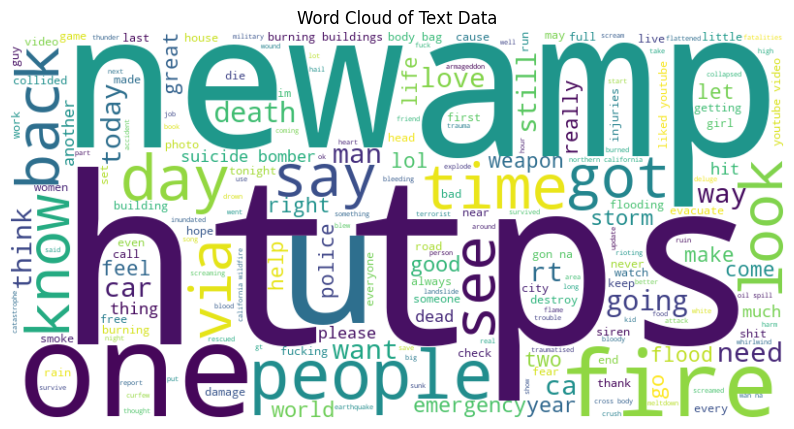

In [43]:
# Generate a word cloud for the text data
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(all_words))

# Display the word cloud
plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Text Data')
plt.show()


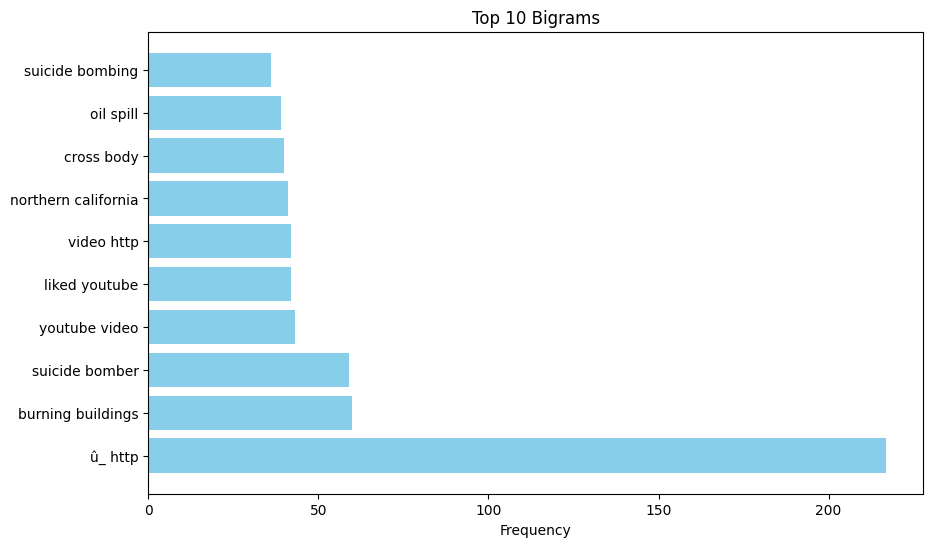

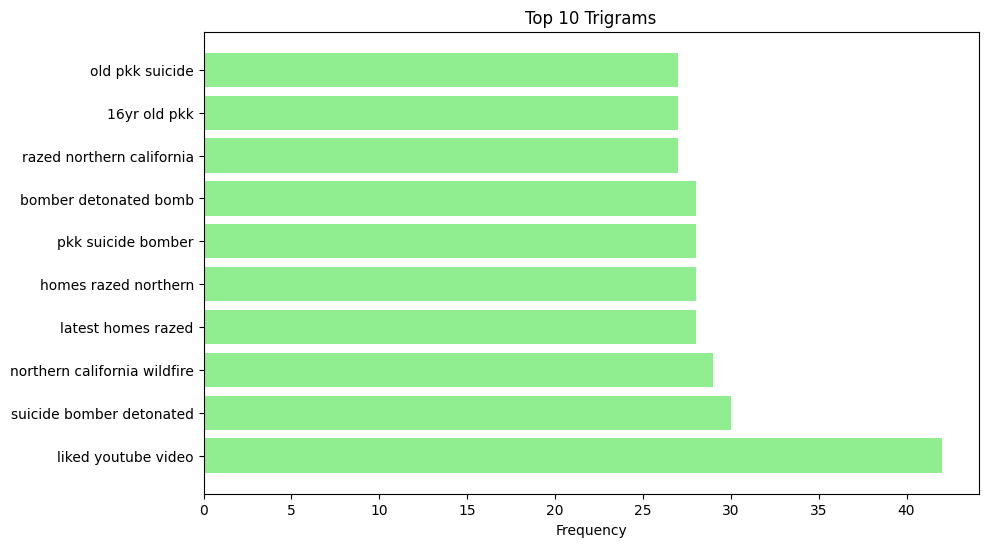

In [44]:
# Plotting the frequency distribution of bigrams
bigrams_dict = dict(bigrams[:10])
plt.figure(figsize=(10, 6))
plt.barh(list(bigrams_dict.keys()), list(bigrams_dict.values()), color='skyblue')
plt.xlabel('Frequency')
plt.title('Top 10 Bigrams')
plt.show()

# Plotting the frequency distribution of trigrams
trigrams_dict = dict(trigrams[:10])
plt.figure(figsize=(10, 6))
plt.barh(list(trigrams_dict.keys()), list(trigrams_dict.values()), color='lightgreen')
plt.xlabel('Frequency')
plt.title('Top 10 Trigrams')
plt.show()


In [45]:
# Save the processed tokens or text data
train.to_csv("processed_text_train.csv", index=False)


In [46]:
# Save the processed test data to a CSV file
test.to_csv("processed_text_test.csv", index=False)

## Feature Analysis

Let's examine the distribution of features.

In [47]:
#Group the train DataFrame by "keyword" column and
# count the "target" Series group values
keyword = train.groupby("keyword")["target"].count()

#Convert the above Groupby Object to DataFrame and sort the values
keyword_df = pd.DataFrame(data={"keyword":keyword.index, "count":keyword.values}).sort_values(by=["count"],ascending=False)
keyword_df

,keyword,count
0,0,61
105,fatalities,45
64,deluge,42
9,armageddon,42
178,sinking,41
...,...,...
116,forest%20fire,19
95,epicentre,12
195,threat,11
135,inundation,10


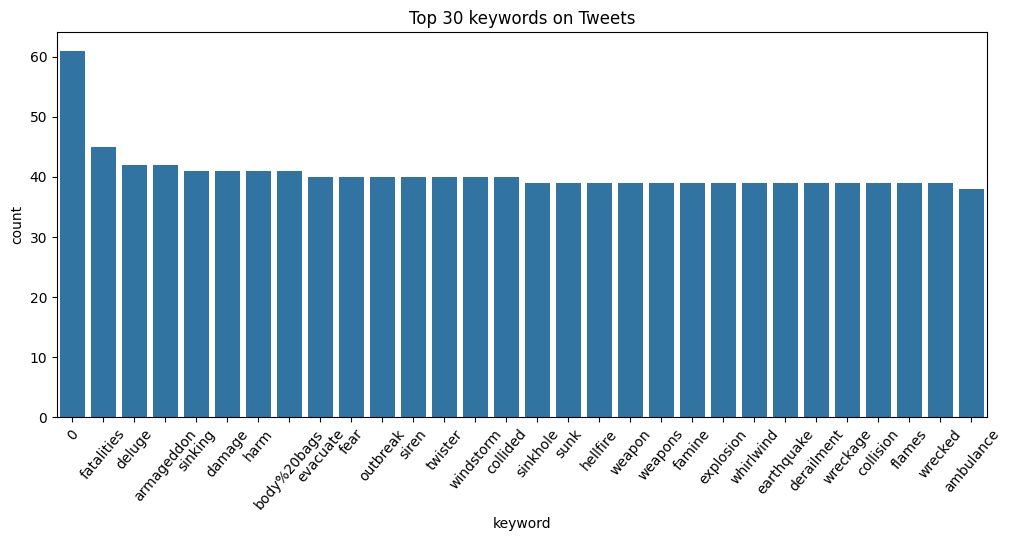

In [48]:
#Let's plot the "key" DataFrame
plt.figure(figsize=(12,5))
#Limit the data to top 30 keywords by .head() method
sns.barplot(data=keyword_df.head(30), x = 'keyword',y = 'count')
plt.xticks(rotation = 50)
plt.ylabel('count')
plt.title('Top 30 keywords on Tweets');

In [49]:
#Group the train DataFrame by "keyword" column and
# count the "target" Series group values
location = train.groupby("location")["target"].count()

#Convert the above Groupby Object to DataFrame and sort the values
location_df = pd.DataFrame(data={"location":location.index, "count":location.values}).sort_values(by=["count"],ascending=False)
location_df

,location,count
80,0,2533
2644,USA,104
1827,New York,71
2663,United States,50
1507,London,45
...,...,...
1199,Hueco Mundo,1
1200,"Hughes, AR",1
1201,"Huntington, WV",1
1202,"Huntley, IL",1


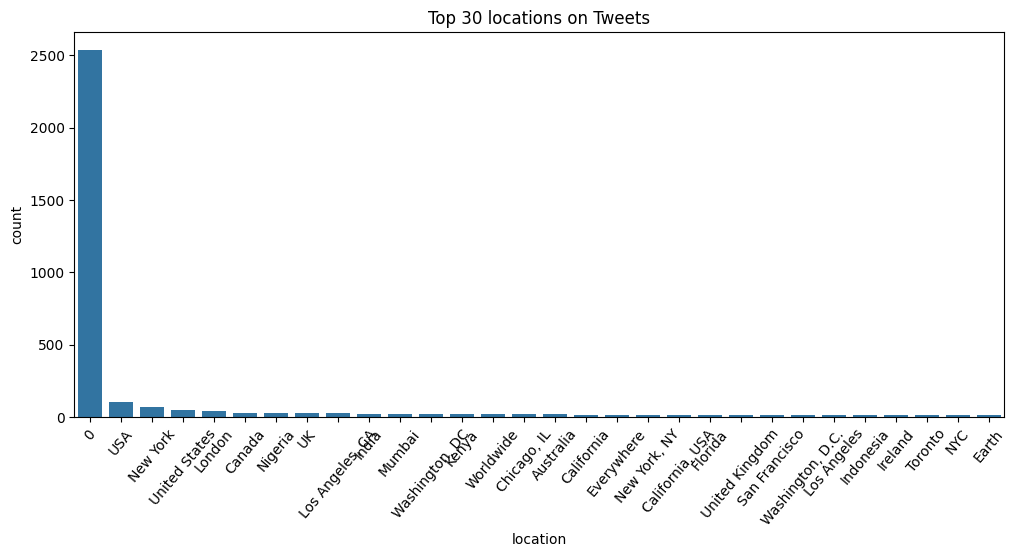

In [50]:
#Let's plot the "location" DataFrame
plt.figure(figsize=(12,5))

#Limit the data to top 30 locations by .head() method
sns.barplot(data=location_df.head(30), x = 'location',y = 'count')
plt.xticks(rotation = 50)
plt.ylabel('count')
plt.title('Top 30 locations on Tweets');

**The "0" location used in place of "Null" values have distorted the view of location distribution. Let's plot the distribution without "0" value**

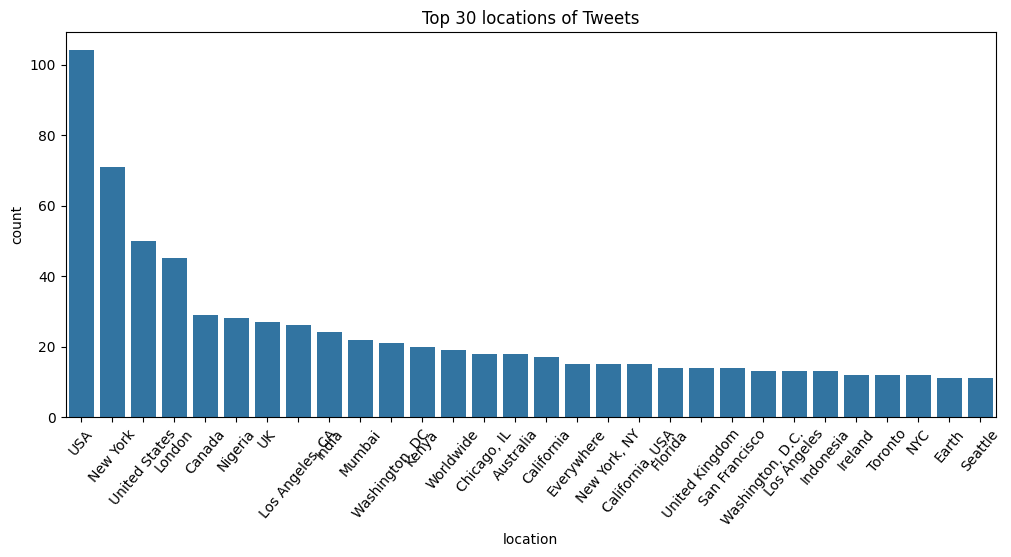

In [51]:
#Let's plot the "location" DataFrame with "0" discarded
plt.figure(figsize=(12,5))

#Limit the data to top 30 locations by .head() method
# and use the iloc to discard "0"
sns.barplot(data=location_df.head(31).iloc[1:,:], x = 'location',y = 'count')
plt.xticks(rotation = 50)
plt.ylabel('count')
plt.title('Top 30 locations of Tweets');

In [52]:
#Define a function to get the maximum length of words in each column
def check_max_length_sentence(df):
    max_length = 0
    for text in df["text"]:
        if len(text) > max_length:
            max_length = len(text)
    print("Maximum length of Text column is:",max_length)
    
    max_length = 0
    for text in df["location"]:
        if len(text) > max_length:
            max_length = len(text)
    print("Maximum length of Location column is:",max_length)
    
    max_length = 0
    for text in df["keyword"]:
        if len(text) > max_length:
            max_length = len(text)
    print("Maximum length of Keyword column is:",max_length)

In [53]:
#Maximum lengths of columns in train data
check_max_length_sentence(train)

Maximum length of Text column is: 157
Maximum length of Location column is: 49
Maximum length of Keyword column is: 21


In [54]:
#Maximum lengths of columns in test data
check_max_length_sentence(test)

Maximum length of Text column is: 151
Maximum length of Location column is: 42
Maximum length of Keyword column is: 21


**Relying solely on the length of tweets doesn't provide a comprehensive understanding. To gain a better perspective on the maximum length required for vectorization, let's examine the distribution of tweet lengths.**

In [55]:
def get_sentence_lengths(df):
    df2 = pd.DataFrame(columns=["length"])
    i = 0
    for text in df["text"]:
        df2.loc[i,"length"] = len(text)
        i+=1
    return df2

def plot_sentence_lengths(df):
    lengths_df = get_sentence_lengths(df)
    bins = range(0,161,20)
    plt.hist(lengths_df["length"], bins=bins,alpha=0.3)
    #sns.countplot(data=lengths_df, x="length")
    plt.title("Distribution of sentence lengths")

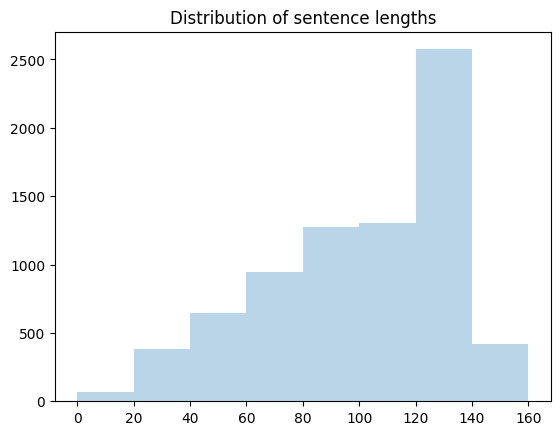

In [56]:
#Use the plot_sentence_lengths function on train dataset
plot_sentence_lengths(train)

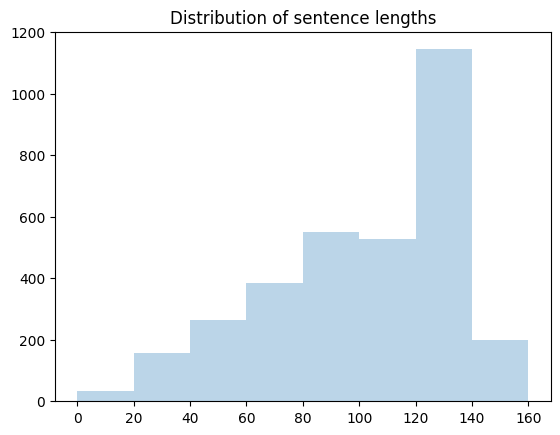

In [57]:
#Use the plot_sentence_lengths function on test dataset
plot_sentence_lengths(test)

## Analyze the Disaster on Social Media dataset

In [58]:
#Extract the part relevant columns
train2s = train2s[["keyword","location","text","choose_one"]].copy()
train2s

,keyword,location,text,choose_one
0,NaN,NaN,Just happened a terrible car crash,Relevant
1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,Relevant
2,NaN,NaN,"Heard about #earthquake is different cities, s...",Relevant
3,NaN,NaN,"there is a forest fire at spot pond, geese are...",Relevant
4,NaN,NaN,Forest fire near La Ronge Sask. Canada,Relevant
...,...,...,...,...
10871,NaN,NaN,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,Relevant
10872,NaN,NaN,Police investigating after an e-bike collided ...,Relevant
10873,NaN,NaN,The Latest: More Homes Razed by Northern Calif...,Relevant
10874,NaN,NaN,MEG issues Hazardous Weather Outlook (HWO) htt...,Relevant


In [59]:
#Check for the Null values
train2s.isnull().sum()

keyword         87
location      3638
text             0
choose_one       0
dtype: int64

Total number of samples in the data = 10876


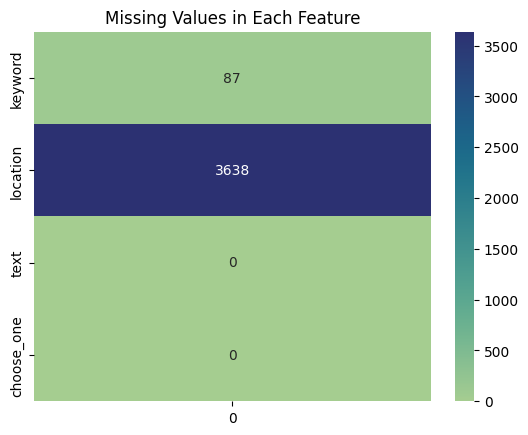

In [60]:
#For a better understanding, let's see the plot of Null values
plot_null_values(train2s)

Total number of samples in the data = 10876


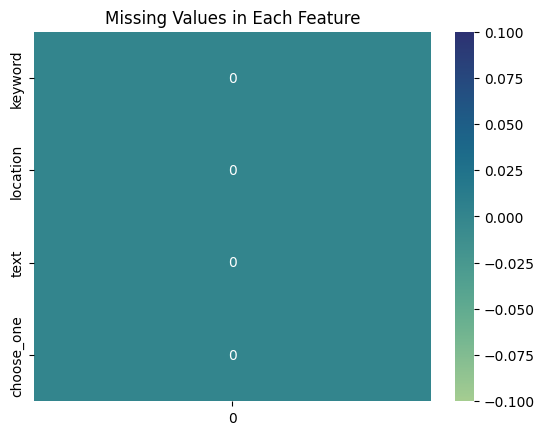

In [61]:
#Fill the Null values with str(0)
train2s.fillna("0",inplace=True)

#Check for te Null values
plot_null_values(train2s)

### Target Analysis of Disaster on Social Media dataset

In [62]:
#Renname the "choose_one" column as "text"
train2s.rename(columns={"choose_one":"target"},inplace=True)
train2s.head()

,keyword,location,text,target
0,0,0,Just happened a terrible car crash,Relevant
1,0,0,Our Deeds are the Reason of this #earthquake M...,Relevant
2,0,0,"Heard about #earthquake is different cities, s...",Relevant
3,0,0,"there is a forest fire at spot pond, geese are...",Relevant
4,0,0,Forest fire near La Ronge Sask. Canada,Relevant


In [63]:
#Unique values in the target column
train2s["target"].unique()

array(['Relevant', 'Not Relevant', "Can't Decide"], dtype=object)

In [64]:
#Count the unique values in the target column
target_count = train2s["target"].value_counts()
target_count_df = pd.DataFrame(data={"target_category":target_count.index, "count":target_count.values})
target_count_df

,target_category,count
0,Not Relevant,6187
1,Relevant,4673
2,Can't Decide,16


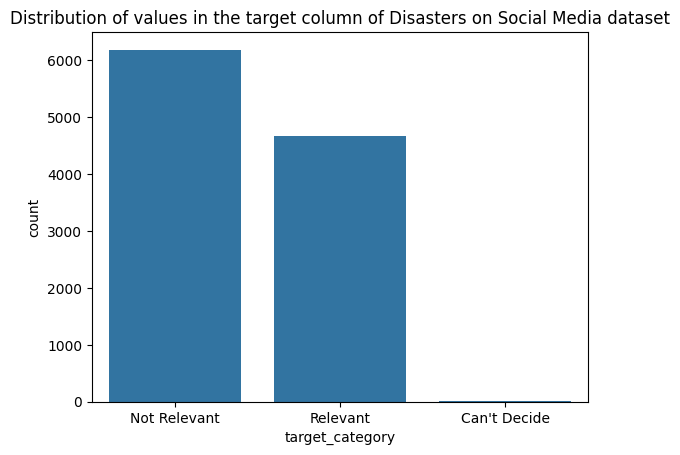

In [65]:
#Plot the values count of target column
sns.barplot(data=target_count_df,x="target_category", y="count")
plt.title("Distribution of values in the target column of Disasters on Social Media dataset");

In [66]:
#Let's convert the categorical values of target column to integer
train2s["target"] = (train2s["target"] == "Relevant").astype("int")
train2s.head()

,keyword,location,text,target
0,0,0,Just happened a terrible car crash,1
1,0,0,Our Deeds are the Reason of this #earthquake M...,1
2,0,0,"Heard about #earthquake is different cities, s...",1
3,0,0,"there is a forest fire at spot pond, geese are...",1
4,0,0,Forest fire near La Ronge Sask. Canada,1


In [67]:
#Count the unique values in the target column
df = train2s["target"].value_counts()
df = pd.DataFrame({"target_value":df.index, "count":df.values})

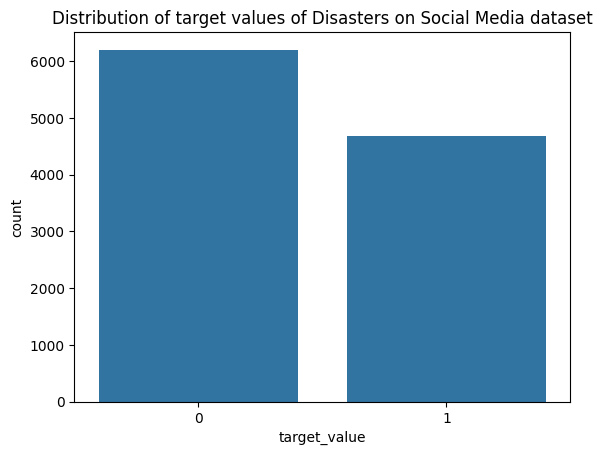

In [68]:
#Plot the values count of target column
sns.barplot(data=df, x="target_value", y="count")
plt.title("Distribution of target values of Disasters on Social Media dataset");

## Data processing

In [69]:
#View the train dataset
train.head(2)

,id,keyword,location,text,target,tokens
0,1,0,0,Our Deeds are the Reason of this #earthquake M...,1,"[deeds, reason, earthquake, may, allah, forgiv..."
1,4,0,0,Forest fire near La Ronge Sask. Canada,1,"[forest, fire, near, la, ronge, sask, canada]"


In [70]:
#View the processed "disaster on Social Media" dataset
train2s.head(2)

,keyword,location,text,target
0,0,0,Just happened a terrible car crash,1
1,0,0,Our Deeds are the Reason of this #earthquake M...,1


In [71]:
#Remove the "id" column form the train DataFrame
train.pop("id")

0           1
1           4
2           5
3           6
4           7
        ...  
7608    10869
7609    10870
7610    10871
7611    10872
7612    10873
Name: id, Length: 7613, dtype: int64

In [72]:
train.head(2)

,keyword,location,text,target,tokens
0,0,0,Our Deeds are the Reason of this #earthquake M...,1,"[deeds, reason, earthquake, may, allah, forgiv..."
1,0,0,Forest fire near La Ronge Sask. Canada,1,"[forest, fire, near, la, ronge, sask, canada]"


In [73]:
#Combine the two datasets
train_dataset = pd.concat([train, train2s])
train_dataset.head()

,keyword,location,text,target,tokens
0,0,0,Our Deeds are the Reason of this #earthquake M...,1,"[deeds, reason, earthquake, may, allah, forgiv..."
1,0,0,Forest fire near La Ronge Sask. Canada,1,"[forest, fire, near, la, ronge, sask, canada]"
2,0,0,All residents asked to 'shelter in place' are ...,1,"[residents, asked, place, notified, officers, ..."
3,0,0,"13,000 people receive #wildfires evacuation or...",1,"[people, receive, wildfires, evacuation, order..."
4,0,0,Just got sent this photo from Ruby #Alaska as ...,1,"[got, sent, photo, ruby, alaska, smoke, wildfi..."


In [74]:
#Shape of the combined dataset
train_dataset.shape

(18489, 5)

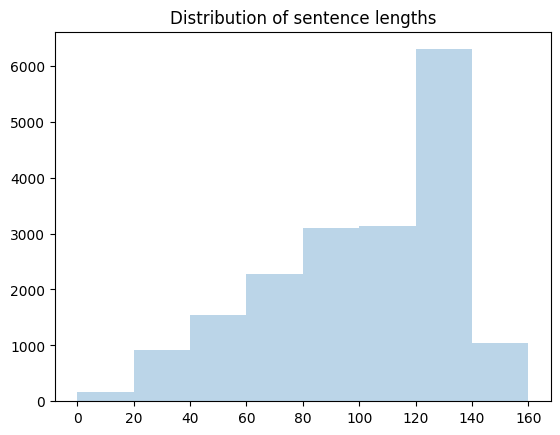

In [75]:
#Use the plot_sentence_lengths to check the distribution og tweet lengths
plot_sentence_lengths(train_dataset)

In [76]:
#Shuffle the DataFrame
train_dataset = shuffle(train_dataset, random_state=SEED)
train_dataset = shuffle(train_dataset, random_state=int(SEED/2))
train_dataset.head()

,keyword,location,text,target,tokens
3046,death,0,@Kaay_Paat it's actually death and takes way l...,0,NaN
10789,wrecked,Pennsylvania,Four hundred wrecked cars (costing $100 apiece...,0,NaN
467,attack,Online 24/7. Not even kidding.,Notley's tactful yet very direct response to H...,1,"[notley, tactful, yet, direct, response, harpe..."
7480,wreck,0,Ranking #artectura #pop2015 #Nå¼36 Florence + ...,0,"[ranking, artectura, florence, machine, ship, ..."
6772,lightning,"Greensboro, North Carolina",Heavy rain gusty winds and vivid lightning mov...,1,NaN


In [77]:
# Export the train_dataset DataFrame to a CSV file
train_dataset.to_csv("train_dataset.csv", index=False)

In [80]:
#Convert train data to tf.data.Dataset object
BATCH = 32
#Concatenate the text data of the columns "keyword", "location", "text"
train_tf = tf.data.Dataset.from_tensor_slices(
    (train_dataset['keyword'] + train_dataset['location'] + train_dataset['text'], train_dataset[TARGET]))

#Convert the data into batch
train_tf = train_tf.shuffle(int((SEED*13)/8)).batch(BATCH)

#Convert test data to tf.data.Dataset object
test_tf = tf.data.Dataset.from_tensor_slices(test['keyword'] + test['location'] + test['text'])

#Convert the data into batch
test_tf = test_tf.batch(BATCH)

## Text Vectorization

To enable the model to process the text data, we need to convert it into integer values through a process called text vectorization.

In [81]:
max_length = 165
max_tokens = 20_000

#Instantiate the TextVectorization layer
text_vectorization = layers.TextVectorization(max_tokens=max_tokens,
                                              output_mode='int',
                                              output_sequence_length=max_length
                                             )

In [82]:
#Learn the vocabulary
text_vectorization.adapt(train_tf.map(lambda twt, target: twt))

In [83]:
#Get the vocabulary
vocab = text_vectorization.get_vocabulary()
print("Vocabulary size =",len(vocab))

#Convert the list object to NumPy array for decoding the vectorized data
vocab = np.array(vocab)

Vocabulary size = 20000


In [84]:
#Vectorize the train dataset
train_tf = train_tf.map(lambda twt, target: (text_vectorization(twt), target),
                   num_parallel_calls=tf.data.AUTOTUNE)

#Vectorize the test dataset
test_tf = test_tf.map(lambda twt: text_vectorization(twt),
                      num_parallel_calls=tf.data.AUTOTUNE)

In [85]:
#Define a function to print the tokenized data
def print_sample(data_obj):
    for sample, traget in data_obj:
        #Print the first item
        print("1st sample:",sample[0].numpy())
        print("\n")
        #Print the second item
        print("2nd sample:",sample[1].numpy())
        print("\n")
        #Print the third item
        print("3rd sample:",sample[2].numpy())
        print("\n")
        break

In [86]:
#Print the tokenized data
print_sample(train_tf)

1st sample: [ 7406 10288    50   917   549  1075  1210  1245   792  1638  1272   275
    82   317  1222  6711     1   172     1     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0   

In [87]:
#Print the vectorized tweet and the decoded tweet
for tx in train_tf:
    print("\t\t\t\tVectorized Tweet:\n",tx[0][0])
    print("\n\n\t\t\t\tDecoded Tweet:\n", " ".join(vocab[tx[0][0].numpy()]))
    break

				Vectorized Tweet:
 tf.Tensor(
[   1   78  113 2537    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0], shape=(165,), dtype=int64)


				Decoded Tweet:
 [UNK] her go passenger                                                        

## Model

To classify the tweets, we will employ a Transformer model specifically designed as an Encoder-only model. In this approach, we will define the Encoder layer and incorporate a Positional Embedding layer using Keras subclassing. By utilizing these components, we aim to enhance the accuracy and effectiveness of our classification model.

Moreover, the Transformer model's architecture enables it to capture contextual relationships and dependencies among words or tokens within the tweets. The Encoder layer acts as a powerful feature extractor, learning representations that contribute to the tweet classification task.

Additionally, the Positional Embedding layer adds crucial positional information to the input tokens, enabling the model to discern the sequential order of words in the tweet. This positional encoding facilitates the Transformer model in capturing long-range dependencies and effectively processing the input text.

By combining the Transformer's robust architecture with Keras subclassing, we can create a powerful and flexible model that yields accurate tweet classification results.

In [106]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# Define a Transformer Encoder using a subclassed layer
class TransformerEncoder(layers.Layer):
    def __init__(self, embed_dim, dense_dim, num_heads, apply_pooling=False, **kwargs):
        super().__init__(**kwargs)
        self.embed_dim = embed_dim       # Size of the input vector (e.g., embedding size)
        self.dense_dim = dense_dim       # Size of the inner dense layer
        self.num_heads = num_heads       # Number of attention heads
        self.apply_pooling = apply_pooling  # Optionally apply global max pooling

        # Multi-head attention layer
        self.attention = layers.MultiHeadAttention(num_heads=num_heads, key_dim=embed_dim)

        # Sequential dense layers
        self.dense_proj = keras.Sequential([
            layers.Dense(dense_dim, activation="relu"),  # First dense layer with ReLU
            layers.Dense(embed_dim),                     # Second dense layer to project back to embed_dim
        ])

        # Layer normalization (used after attention and dense layers)
        self.layernorm_1 = layers.LayerNormalization()
        self.layernorm_2 = layers.LayerNormalization()

        # Optional Global Max Pooling
        if self.apply_pooling:
            self.max_pool = layers.GlobalMaxPooling1D()

    # Define the forward pass using the call() method
    def call(self, inputs, mask=None):
        # Prepare attention mask if provided
        if mask is not None:
            mask = mask[:, tf.newaxis, :]  # Expand mask dimensions for multi-head attention

        # Apply multi-head attention
        attention_output = self.attention(inputs, inputs, attention_mask=mask)

        # Apply first layer normalization and residual connection
        proj_input = self.layernorm_1(inputs + attention_output)

        # Apply the dense projection and second layer normalization with residual connection
        proj_output = self.dense_proj(proj_input)
        proj_output = self.layernorm_2(proj_input + proj_output)

        # Optionally apply global max pooling
        if self.apply_pooling:
            return self.max_pool(proj_output)

        return proj_output

    # Define configuration method for serialization
    def get_config(self):
        config = super().get_config()
        config.update({
            "embed_dim": self.embed_dim,
            "num_heads": self.num_heads,
            "dense_dim": self.dense_dim,
            "apply_pooling": self.apply_pooling,  # Include apply_pooling in the config
        })
        return config


In [127]:
import tensorflow as tf
from tensorflow.keras import layers

class PositionalEmbedding(layers.Layer):
    def __init__(self, sequence_length, input_dim, output_dim, **kwargs):
        super().__init__(**kwargs)
        self.sequence_length = sequence_length
        self.input_dim = input_dim
        self.output_dim = output_dim
        self.token_embeddings = layers.Embedding(input_dim=input_dim, output_dim=output_dim)
        self.position_embeddings = layers.Embedding(input_dim=sequence_length, output_dim=output_dim)

    def call(self, inputs):
        # Get the actual length of the inputs (dynamic sequence length)
        length = tf.shape(inputs)[-1]
        
        # Create position indices for the input length
        positions = tf.range(start=0, limit=length, delta=1)
        positions = tf.expand_dims(positions, 0)  # Make it batch-compatible
        
        # Get embeddings for tokens and positions
        embedded_tokens = self.token_embeddings(inputs)
        embedded_positions = self.position_embeddings(positions)
        
        # Add token embeddings and positional embeddings
        return embedded_tokens + embedded_positions

    def compute_mask(self, inputs, mask=None):
        # Return a boolean mask where inputs are not equal to 0 (to handle padding)
        return tf.not_equal(inputs, 0)

    def get_config(self):
        config = super().get_config()
        config.update({
            "sequence_length": self.sequence_length,
            "input_dim": self.input_dim,
            "output_dim": self.output_dim
        })
        return config


In [88]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# Define custom PositionalEmbedding layer
class PositionalEmbedding(layers.Layer):
    def __init__(self, sequence_length, input_dim, output_dim, **kwargs):
        super().__init__(**kwargs)
        self.token_embeddings = layers.Embedding(input_dim=input_dim, output_dim=output_dim)
        self.position_embeddings = layers.Embedding(input_dim=sequence_length, output_dim=output_dim)
        self.sequence_length = sequence_length
        self.input_dim = input_dim
        self.output_dim = output_dim

    def call(self, inputs):
        length = tf.shape(inputs)[-1]
        positions = tf.range(start=0, limit=length, delta=1)
        embedded_tokens = self.token_embeddings(inputs)
        embedded_positions = self.position_embeddings(positions)
        return embedded_tokens + embedded_positions

    def compute_mask(self, inputs, mask=None):
        if mask is None:
            return None
        return mask

    def get_config(self):
        config = super().get_config()
        config.update({
            "sequence_length": self.sequence_length,
            "input_dim": self.input_dim,
            "output_dim": self.output_dim,
        })
        return config

# Define custom TransformerEncoder layer
class TransformerEncoder(layers.Layer):
    def __init__(self, embed_dim, dense_dim, num_heads, **kwargs):
        super().__init__(**kwargs)
        self.embed_dim = embed_dim
        self.dense_dim = dense_dim
        self.num_heads = num_heads
        self.attention = layers.MultiHeadAttention(num_heads=num_heads, key_dim=embed_dim)
        self.dense_proj = keras.Sequential(
            [layers.Dense(dense_dim, activation="relu"), layers.Dense(embed_dim),]
        )
        self.layernorm_1 = layers.LayerNormalization()
        self.layernorm_2 = layers.LayerNormalization()

    def call(self, inputs, mask=None):
        attention_output = self.attention(inputs, inputs, attention_mask=mask)
        proj_input = self.layernorm_1(inputs + attention_output)
        proj_output = self.dense_proj(proj_input)
        return self.layernorm_2(proj_input + proj_output)

    def get_config(self):
        config = super().get_config()
        config.update({
            "embed_dim": self.embed_dim,
            "dense_dim": self.dense_dim,
            "num_heads": self.num_heads,
        })
        return config

# Define the inputs
inputs = keras.Input(shape=(None,), dtype="int64")  # Variable sequence lengths

# Apply positional embeddings
pos_embed = PositionalEmbedding(sequence_length=200,   # Adjust to match your sequence length
                                input_dim=21647,      # Adjust to match your vocabulary size
                                output_dim=256)(inputs)

# Apply the Transformer encoder
encoded = TransformerEncoder(embed_dim=256,
                             dense_dim=32,
                             num_heads=8)(pos_embed)

# Apply global max pooling and dense layer for classification
pooled_output = layers.GlobalMaxPooling1D()(encoded)
final_output = layers.Dense(1, activation='sigmoid')(pooled_output)

# Build the model
model = keras.Model(inputs=inputs, outputs=final_output)

# Compile the model
model.compile(optimizer='adam', 
              loss='binary_crossentropy', 
              metrics=['accuracy'])

# Print the model summary
model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, None)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ positional_embedding            │ (None, None, 256)      │     5,592,832 │
│ (PositionalEmbedding)           │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ transformer_encoder             │ (None, None, 256)      │     2,121,248 │
│ (TransformerEncoder)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_max_pooling1d            │ (None, 256)            │             0 │
│ (GlobalMaxPooling1D)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,714,337 (29.43 MB)

 Trainable params: 7,714,337 (29.43 MB)

 Non-trainable params: 0 (0.00 B)

In [77]:
#Compile the model
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-5, beta_1=0.9, beta_2=0.98,epsilon=1e-9),
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=['accuracy']
             )

In [131]:
#Summary of the model
model.summary()

Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_18 (InputLayer)     │ (None, None)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ positional_embedding_19         │ (None, None, 256)      │     5,592,832 │
│ (PositionalEmbedding)           │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ transformer_encoder_1           │ (None, None, 256)      │     2,121,248 │
│ (TransformerEncoder)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_max_pooling1d_1          │ (None, 256)            │             0 │
│ (GlobalMaxPooling1D)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,714,337 (29.43 MB)

 Trainable params: 7,714,337 (29.43 MB)

 Non-trainable params: 0 (0.00 B)

In [89]:
#Plot the model
keras.utils.plot_model(model=model,
                       to_file="model.png",
                       show_shapes=True,
                       show_layer_names=True,
                       expand_nested=True,
                       show_layer_activations=True,
                       show_trainable=True,
        )

You must install graphviz (see instructions at https://graphviz.gitlab.io/download/) for `plot_model` to work.


In [133]:
pip install pydot

Note: you may need to restart the kernel to use updated packages.


In [90]:
import tensorflow as tf
from tensorflow.keras import callbacks  # Import the callbacks module

# Define your list of model callbacks
model_callbacks = [
    callbacks.ModelCheckpoint("tweets_classifier.keras", save_best_only=True)  # Save the best model
]

# Define the EarlyStopping callback
early_stopping = callbacks.EarlyStopping(
    monitor='val_loss',  # Metric to monitor
    patience=5,          # Number of epochs with no improvement
    restore_best_weights=True  # Restore weights from the best epoch
)

# Add the early stopping callback to the list
model_callbacks.append(early_stopping)

In [91]:
#Define the validation data size
val_size = int(0.2 * len(train_tf))

In [92]:
# Split the data into training and validation
validation_data = train_tf.take(val_size)
train_data = train_tf.skip(val_size)

In [79]:
import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))


Num GPUs Available:  0


In [78]:
# Check for GPU availability and set memory growth
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
    try:
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
        print(f"GPU is available. Number of GPUs: {len(gpus)}")
    except RuntimeError as e:
        print(e)
else:
    print("No GPU available. Running on CPU.")

No GPU available. Running on CPU.


In [142]:
import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))
print("TensorFlow version:", tf.__version__)

Num GPUs Available:  0
TensorFlow version: 2.17.0


In [93]:
#Train the model
history = model.fit(train_data,
                    epochs=120,
                    validation_data=validation_data,
                    batch_size=32,           # Batch size
                    callbacks=model_callbacks)

Epoch 1/120
463/463 ━━━━━━━━━━━━━━━━━━━━ 194s 409ms/step - accuracy: 0.6545 - loss: 0.7322 - val_accuracy: 0.9076 - val_loss: 0.2431
Epoch 2/120
463/463 ━━━━━━━━━━━━━━━━━━━━ 410s 885ms/step - accuracy: 0.9275 - loss: 0.2060 - val_accuracy: 0.9633 - val_loss: 0.0992
Epoch 3/120
463/463 ━━━━━━━━━━━━━━━━━━━━ 365s 788ms/step - accuracy: 0.9748 - loss: 0.0800 - val_accuracy: 0.9804 - val_loss: 0.0600
Epoch 4/120
463/463 ━━━━━━━━━━━━━━━━━━━━ 220s 476ms/step - accuracy: 0.9850 - loss: 0.0499 - val_accuracy: 0.9818 - val_loss: 0.0601
Epoch 5/120
463/463 ━━━━━━━━━━━━━━━━━━━━ 220s 475ms/step - accuracy: 0.9852 - loss: 0.0468 - val_accuracy: 0.9886 - val_loss: 0.0336
Epoch 6/120
463/463 ━━━━━━━━━━━━━━━━━━━━ 168s 363ms/step - accuracy: 0.9899 - loss: 0.0323 - val_accuracy: 0.9908 - val_loss: 0.0294
Epoch 7/120
463/463 ━━━━━━━━━━━━━━━━━━━━ 198s 426ms/step - accuracy: 0.9901 - loss: 0.0300 - val_accuracy: 0.9897 - val_loss: 0.0315
Epoch 8/120
463/463 ━━━━━━━━━━━━━━━━━━━━ 289s 623ms/step - accuracy: 

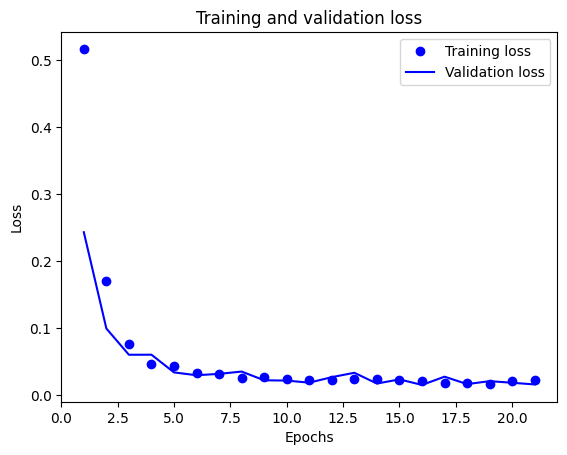

In [94]:
# Plotting the training and validation loss
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

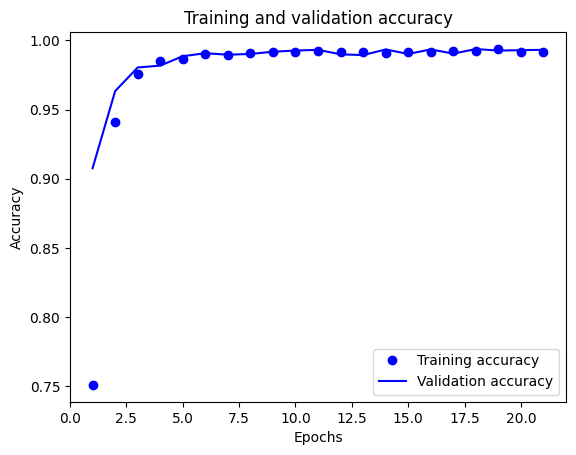

In [95]:
# Plotting the training and validation accuracy
acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training accuracy")
plt.plot(epochs, val_acc, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()

In [96]:
#Classify the tweets of test data
predictions = model.predict(test_tf)

102/102 ━━━━━━━━━━━━━━━━━━━━ 10s 93ms/step


In [97]:
#Print the predictions
predictions

array([[0.99980235],
       [0.99709415],
       [0.9995809 ],
       ...,
       [0.9994105 ],
       [0.99795854],
       [0.997432  ]], dtype=float32)

In [98]:
threshold = 0.5
#Convert the float values to binary
final_predictions = [1 if i > threshold else 0 for i in predictions]
final_predictions[:10]

[1, 1, 1, 1, 1, 1, 0, 0, 0, 0]

In [99]:
sample

,id,target
0,0,0
1,2,0
2,3,0
3,9,0
4,11,0
...,...,...
3258,10861,0
3259,10865,0
3260,10868,0
3261,10874,0


In [100]:
submissions = pd.DataFrame(columns=["id","target"])
submissions["target"] = final_predictions
submissions["id"] = test.id
submissions

,id,target
0,0,1
1,2,1
2,3,1
3,9,1
4,11,1
...,...,...
3258,10861,0
3259,10865,1
3260,10868,1
3261,10874,1


In [101]:
#Save the file as a csv file
submissions.to_csv("submission.csv", index=False)

In [102]:
model.save('path_to_your_model.h5')

In [106]:
from tensorflow.keras.models import load_model
from tensorflow.keras.utils import custom_object_scope

# Ensure custom layers are registered
with custom_object_scope({'PositionalEmbedding': PositionalEmbedding, 'TransformerEncoder': TransformerEncoder}):
    # Load the model
    model = load_model('path_to_your_model.h5')

# Verify the model is loaded by printing its summary
model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, None)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ positional_embedding            │ (None, None, 256)      │     5,592,832 │
│ (PositionalEmbedding)           │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ transformer_encoder             │ (None, None, 256)      │     2,121,248 │
│ (TransformerEncoder)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_max_pooling1d            │ (None, 256)            │             0 │
│ (GlobalMaxPooling1D)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,714,339 (29.43 MB)

 Trainable params: 7,714,337 (29.43 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

In [107]:
# Predict the test data
predictions = model.predict(test_tf)

# Print the predictions
print(predictions)

102/102 ━━━━━━━━━━━━━━━━━━━━ 10s 94ms/step
[[0.99980235]
 [0.99709415]
 [0.9995809 ]
 ...
 [0.9994105 ]
 [0.99795854]
 [0.997432  ]]


In [108]:
Here are the operations applied to `test.csv` till it reached `test_tf`:

1. **Loading the test data:**
    ```python
    test = pd.read_csv("test.csv")
    ```

2. **Tokenizing text data and removing stopwords:**
    ```python
    train['tokens'] = train['text'].apply(lambda x: nltk.word_tokenize(x.lower()))
    stop_words = set(stopwords.words('english'))
    train['tokens'] = train['tokens'].apply(lambda x: [word for word in x if word.isalpha() and word not in stop_words])
    ```

3. **Converting test data to `tf.data.Dataset` object:**
    ```python
    test_tf = tf.data.Dataset.from_tensor_slices(test['keyword'] + test['location'] + test['text'])
    ```

4. **Batching the test data:**
    ```python
    test_tf = test_tf.batch(BATCH)
    ```

5. **Vectorizing the test dataset:**
    ```python
    test_tf = test_tf.map(lambda twt: text_vectorization(twt), num_parallel_calls=tf.data.AUTOTUNE)
    ```

These steps outline the transformation of `test.csv` data into the `test_tf` dataset used for model predictions.

<_ParallelMapDataset element_spec=TensorSpec(shape=(None, None), dtype=tf.int64, name=None)>


In [124]:
# Create a model that includes the TextVectorization layer
vectorization_model = keras.Sequential([text_vectorization])

# Save the weights of the model
vectorization_model.save_weights("text_vectorization_layer.weights.h5")

# Load the TextVectorization layer
loaded_vectorization_model = keras.Sequential([text_vectorization])
loaded_vectorization_model.load_weights("text_vectorization_layer.weights.h5")

# Verify the loaded model
loaded_vectorization_model.summary()

# Vectorize the test data
vectorized_test_data = loaded_vectorization_model.predict(test['keyword'] + test['location'] + test['text'])

# Display the vectorized test data
print(vectorized_test_data)

model.predict(vectorized_test_data)

Model: "sequential_21"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ text_vectorization              │ (32, 165)              │             0 │
│ (TextVectorization)             │                        │               │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

102/102 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
[[9093  796    3 ...    0    0    0]
 [   1   48  293 ...    0    0    0]
 [   1    9    3 ...    0    0    0]
 ...
 [   1  540  355 ...    0    0    0]
 [   1  570  425 ...    0    0    0]
 [   1   41 2657 ...    0    0    0]]
102/102 ━━━━━━━━━━━━━━━━━━━━ 10s 94ms/step


array([[0.99980235],
       [0.99709415],
       [0.9995809 ],
       ...,
       [0.9994105 ],
       [0.99795854],
       [0.997432  ]], dtype=float32)

In [161]:
from tensorflow.keras.preprocessing.text import Tokenizer

# Initialize the tokenizer
tokenizer = Tokenizer(num_words=max_tokens, oov_token='<OOV>')

# Fit the tokenizer on the text data
tokenizer.fit_on_texts(train['text'])

# Convert the text data to sequences
train_sequences = tokenizer.texts_to_sequences(train['text'])
test_sequences = tokenizer.texts_to_sequences(test['text'])

# Print the first few sequences to verify
print(train_sequences[:5])
print(test_sequences[:5])

[[120, 4634, 25, 5, 869, 9, 22, 264, 139, 1620, 4635, 90, 41], [190, 46, 230, 800, 6955, 6956, 1405], [41, 1752, 1621, 8, 6957, 7, 6958, 25, 137, 6959, 21, 1753, 40, 442, 257, 58, 2159, 7, 715, 1406, 25, 1107], [836, 2922, 60, 4636, 1501, 257, 1406, 7, 97], [35, 101, 1222, 22, 321, 23, 6960, 2160, 31, 272, 23, 1501, 6961, 70, 6, 188]]
[[35, 914, 6, 1952, 131, 93], [475, 57, 264, 12, 1202, 2649, 606, 2322, 246], [78, 12, 6, 190, 46, 20, 826, 3576, 1, 25, 5168, 872, 5, 770, 11, 1415, 506, 98, 41], [480, 3940, 7669, 1501], [218, 796, 478, 2565, 7, 943, 10, 1207]]


In [162]:
import pickle

# Save the tokenizer to a file
with open('tokenizer.pkl', 'wb') as file:
    pickle.dump(tokenizer, file)

In [163]:
# Function to preprocess and predict the sentiment of a new text
def predict_text(text):
    # Tokenize the text
    tokens = tokenizer.texts_to_sequences([text])
    
    # Pad the sequences to the same length as the training data
    padded_tokens = tf.keras.preprocessing.sequence.pad_sequences(tokens, maxlen=max_length, padding='post')
    
    # Predict the sentiment
    prediction = model.predict(padded_tokens)
    
    # Convert the prediction to binary (0 or 1) based on the threshold
    sentiment = 1 if prediction[0] > threshold else 0
    
    return sentiment

# Example usage
new_text = "Just happened a terrible car crash"
predicted_sentiment = predict_text(new_text)
print(f"Predicted sentiment for the text '{new_text}': {predicted_sentiment}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 186ms/step
Predicted sentiment for the text 'Just happened a terrible car crash': 1
